In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as stats
import seaborn as sns

In [2]:
# !pip install openpyxl # For reading excel documents

# Visually Exploring United States Visitation Data

In [3]:
# loads and merges United States State visitation data for 2017-2019
# Returns consolidated dataframe

# define columns 
col_2017 = ['state','visitation_2016']
col_2018 = ['state','visitation_2017']
col_2019 = ['state','visitation_2019','visitation_2018']

# load spreadsheets into pandas
df_2017 = pd.read_excel('assets/US_States_Visited_2017.xlsx', usecols=[1,3],names=col_2017, index_col=None, skiprows=6, skipfooter=13 )
df_2018 = pd.read_excel('assets/US_States_Visited_2018.xlsx', usecols=[1,6], names=col_2018, index_col=None, skiprows=7, skipfooter=7 )
df_2019 = pd.read_excel('assets/US_States_Visited_2019.xlsx', usecols=[1,3,6], names=col_2019, index_col=None, skiprows=6, skipfooter=8 )

# stripping leading and trailing whitespaces
for year in [df_2017,df_2018,df_2019]:
    year['state'] = year.state.str.strip()

# merge dataframes & reorder cols
df = df_2017.merge(df_2018, how='outer', on='state', suffixes=('_L','_R')).merge(df_2019, how='outer', on='state', suffixes=('_L','_R'))
df = df[['state', 'visitation_2016', 'visitation_2017','visitation_2018','visitation_2019']]

# multiplying visitation # by 10000 and sort alphabetically by state
df.iloc[:,1:]= df.iloc[:,1:] * 1000
merged_US_states_visitation = df.sort_values(by='state').reset_index(drop=True)

In [4]:
def make_bar_chart(data):
    """
    Return 4 bar charts of 2016, 2017, 2018 and 2019
    """
    years= [('visitation_2016','2016'),('visitation_2017','2017'),('visitation_2018','2018'),('visitation_2019','2019')]
    for year,title in years:
        fig, ax = plt.subplots(figsize=(20, 8))
        year = sns.barplot(data=data,x='state',y=year, color="#002d47")
        year.set_title(year)
        plt.xticks(rotation=45, fontsize = 10, ha='right')
        plt.ylabel('Number of Visitors', fontsize = 14, fontweight='bold')
        plt.xlabel('State / Territory', fontsize = 14, fontweight='bold')
        plt.title(f'Overseas Visitors in {title} to US Territories', fontsize = 20, fontweight='bold')
        #plt.autoscale()
        year = plt.show()
    

    return None

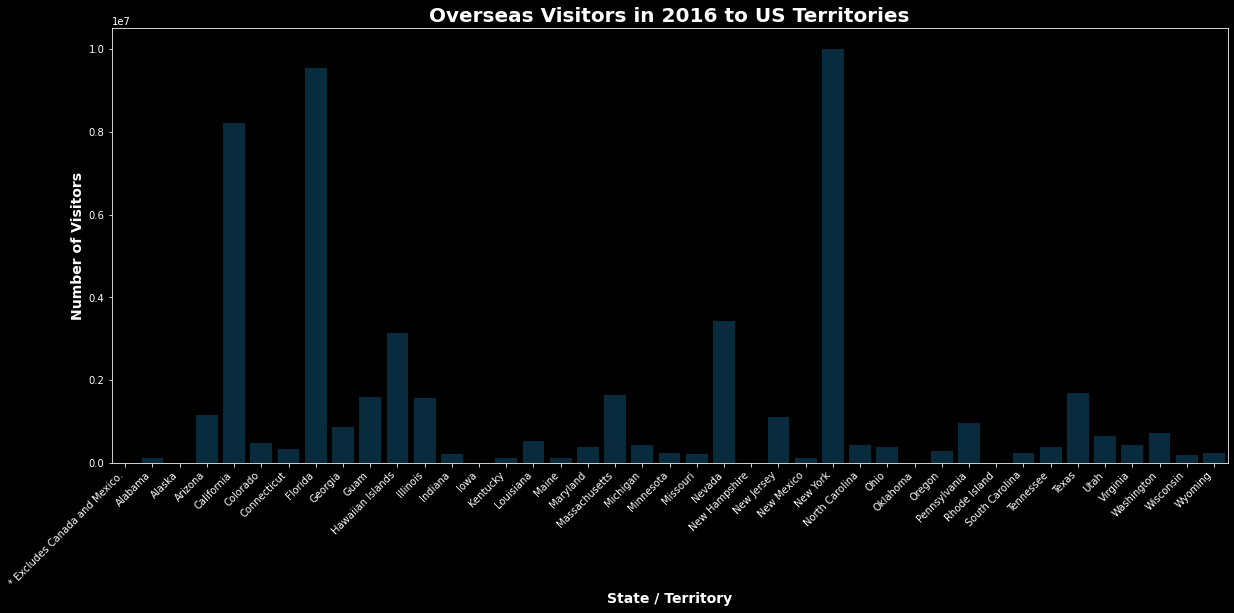

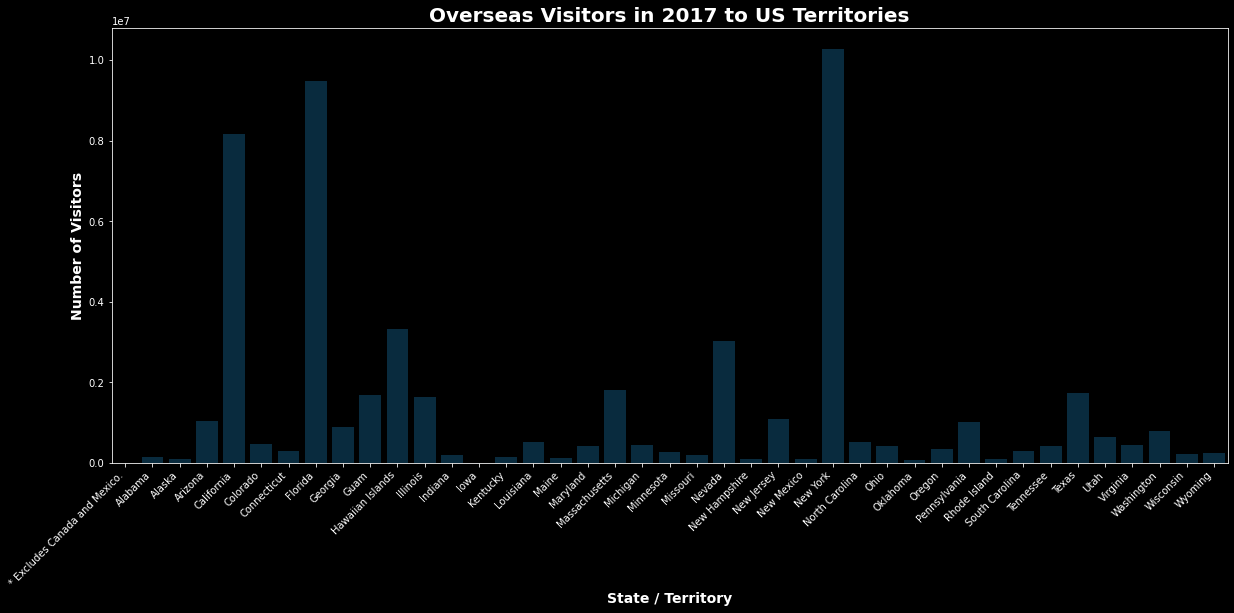

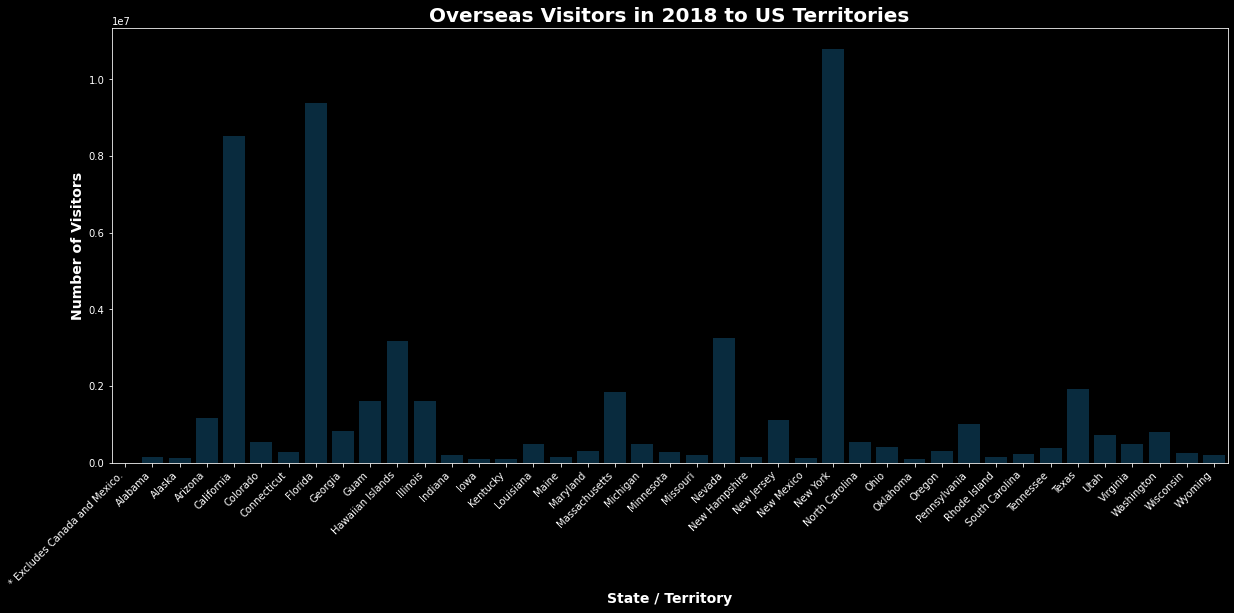

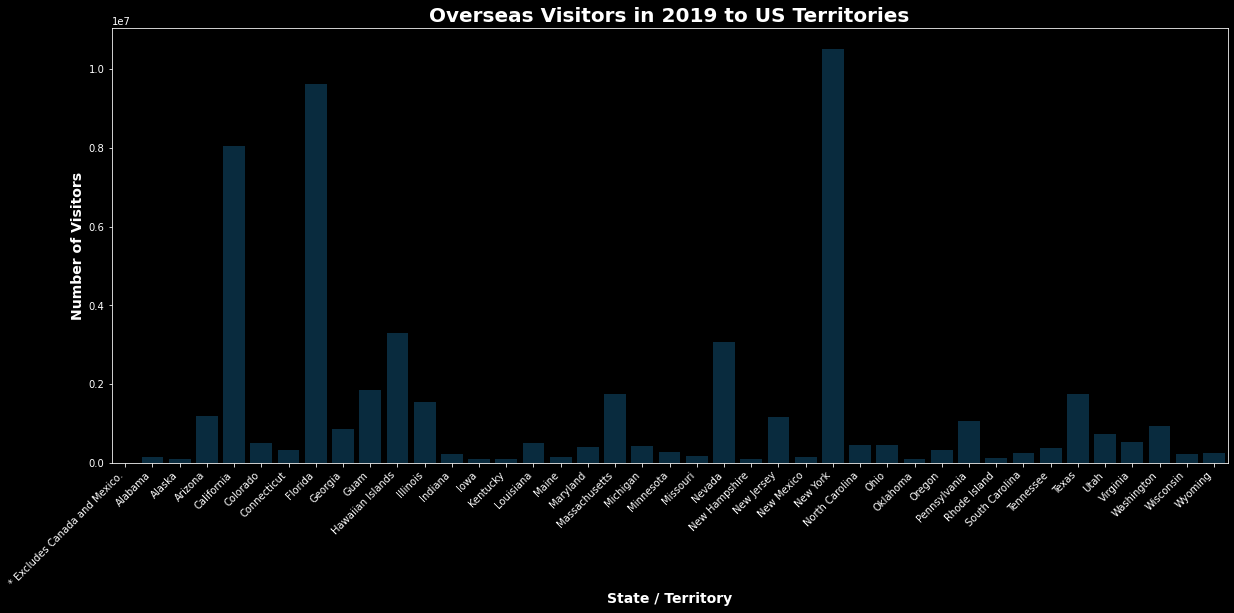

In [5]:
make_bar_chart(merged_US_states_visitation)

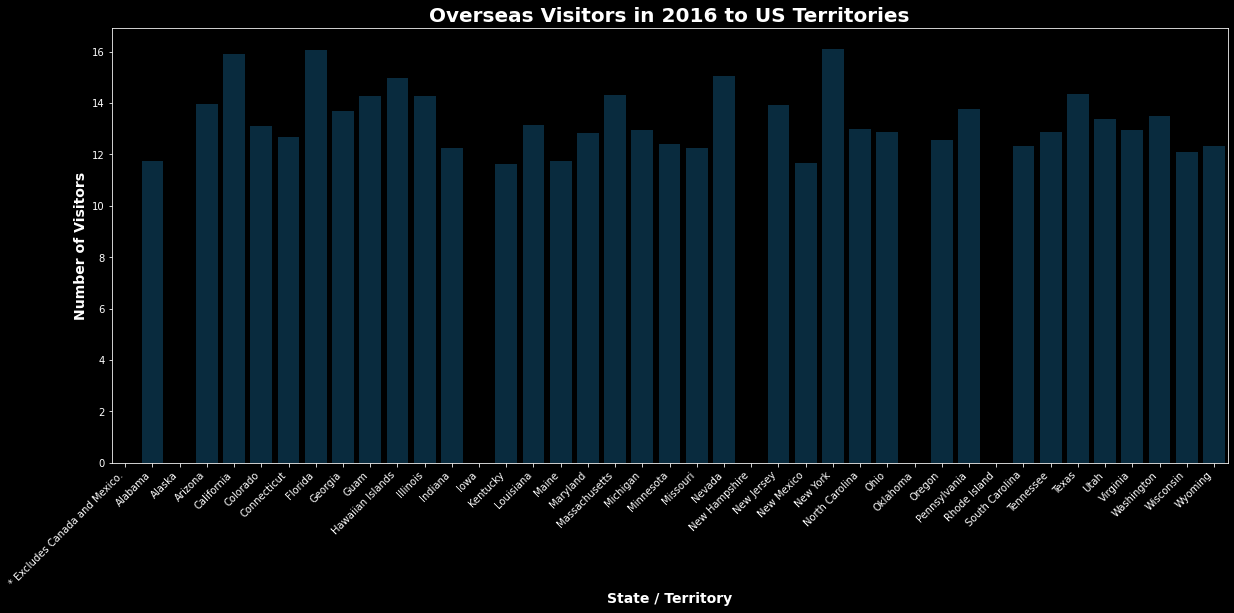

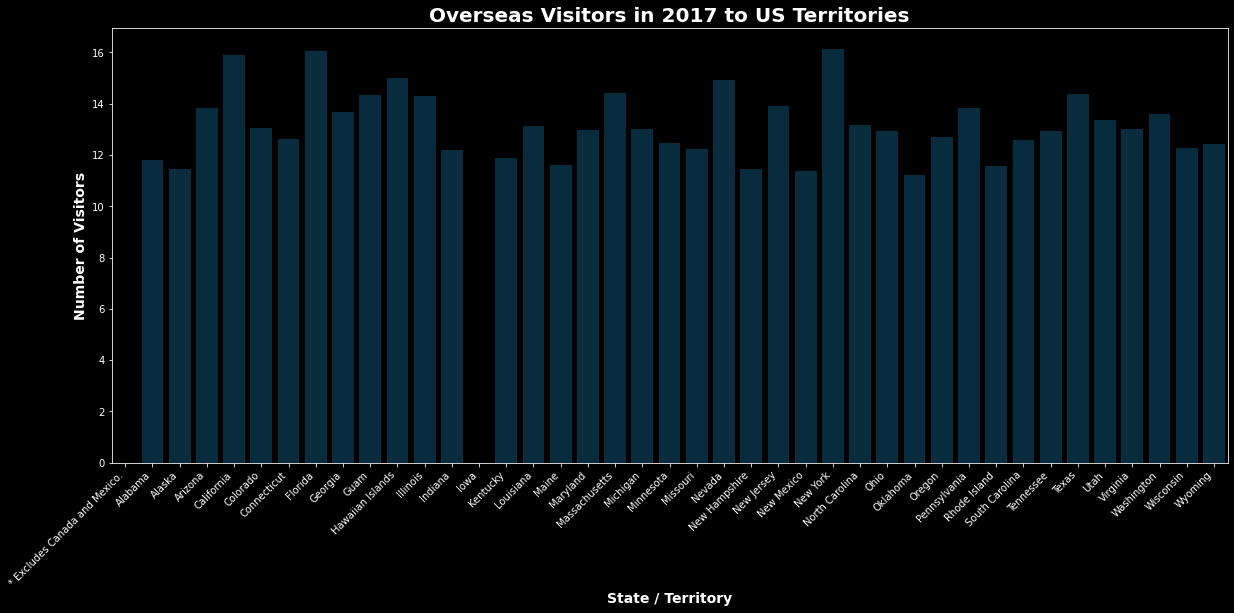

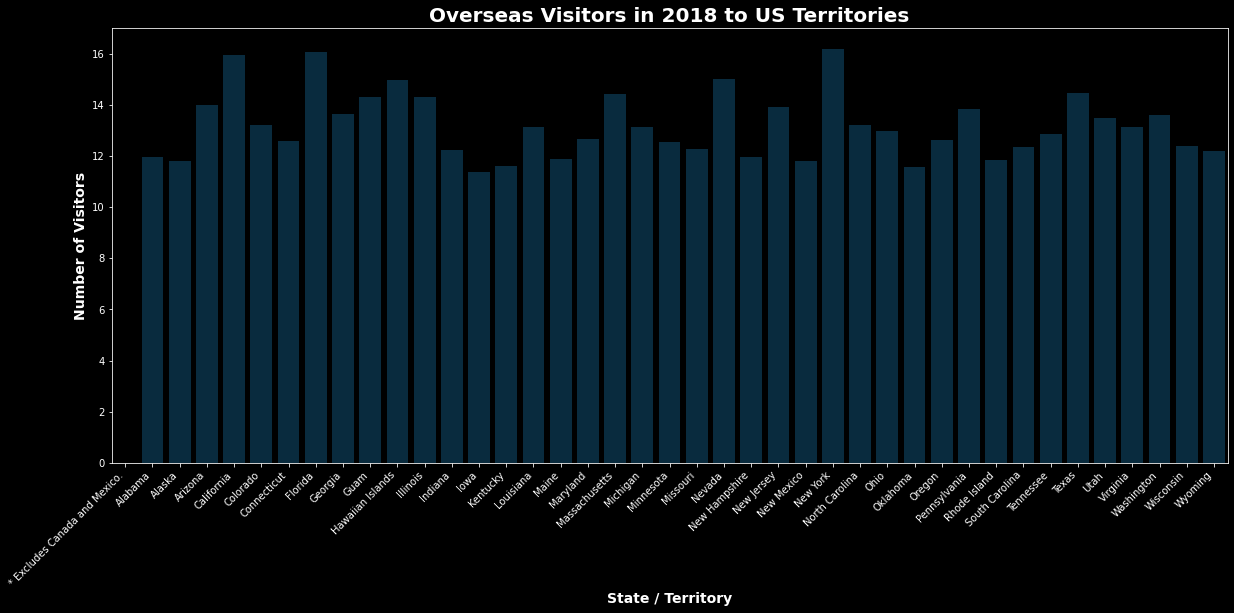

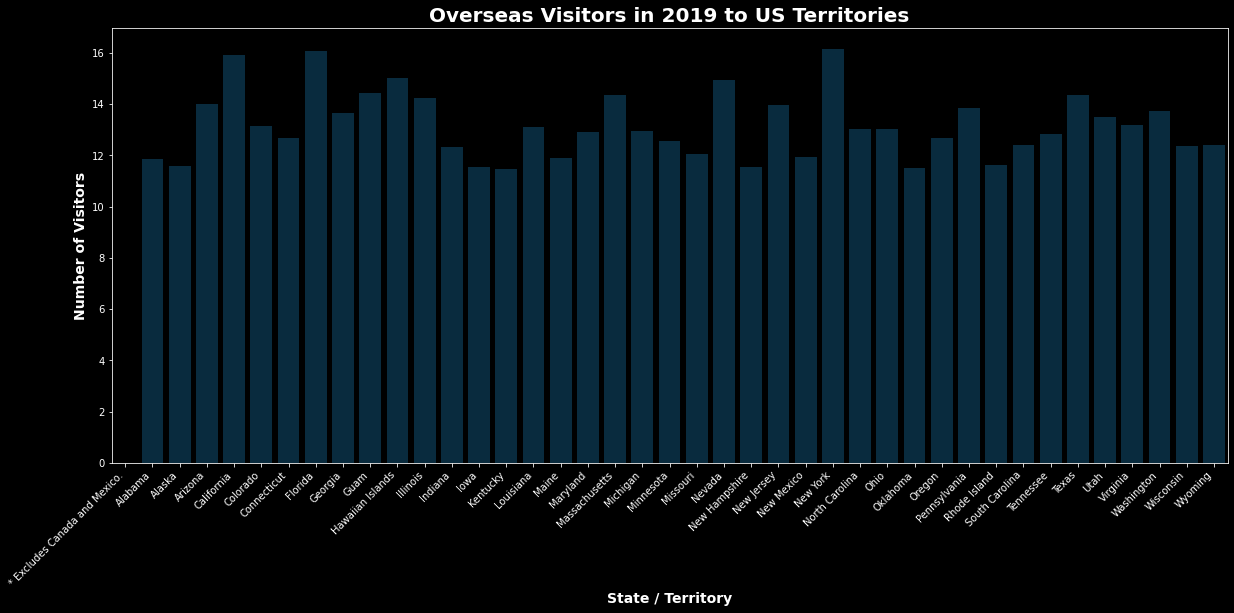

In [6]:
#perform log-transformation on the visitation number and make the same bar charts again
log_us = merged_US_states_visitation.copy()
log_us.iloc[:,1:]= np.log(log_us.iloc[:,1:])

make_bar_chart(log_us)

## Zipf's Law on Visitation (Just for fun!)
Zipf's law is an empirical law originally proposed by a linguist George Kingsley Zipf to generalize word frequency. Zipf's law states that given a large text corpus with many vocabularies used, the frequency of any word is inversely proportional to its rank in the frequency table. There is a wikipedia page talking about his academic contribution: https://en.wikipedia.org/wiki/George_Kingsley_Zipf

For example, **the** is the most frequently occurring word which accounts for nearly 7% of all the words; the runner-up word is **of** which accounts for slightly over 3.5% of words, followed by **and** which accounts for around 2.8%. He observed these patterns and generalized that the $n^{th}$ most frequently occurring word has a frequency of $\frac{1}{n}$ proportional to the most popular word!

Do visitation numbers follow the Zipf's law? 

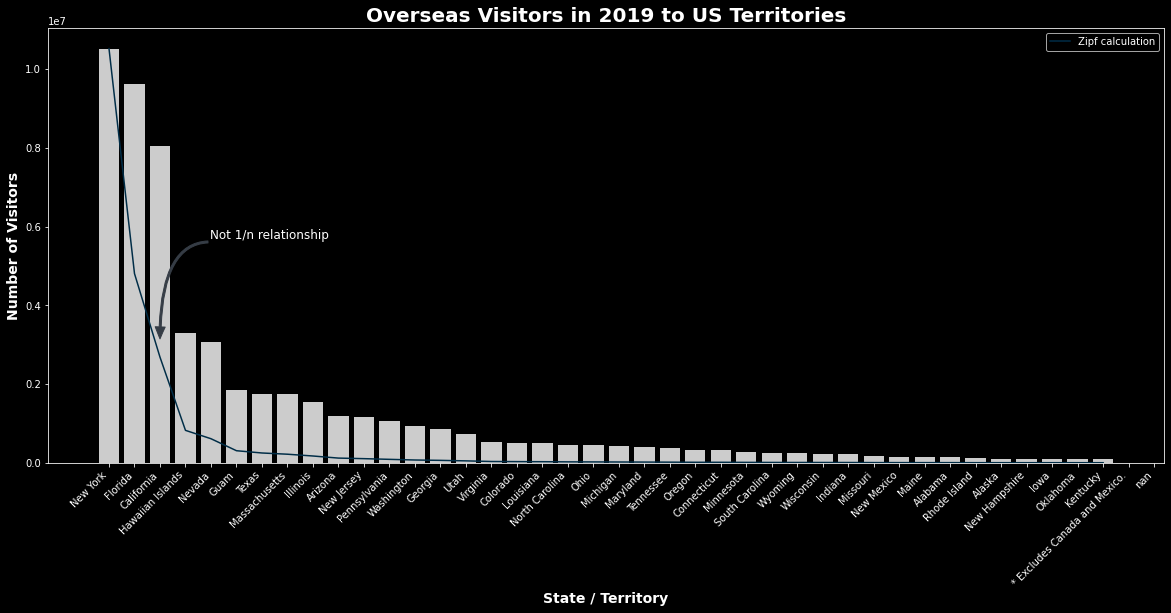

Text(0.5, 1.0, "The data conform to Zipf's law to the extent that the plot is linear")

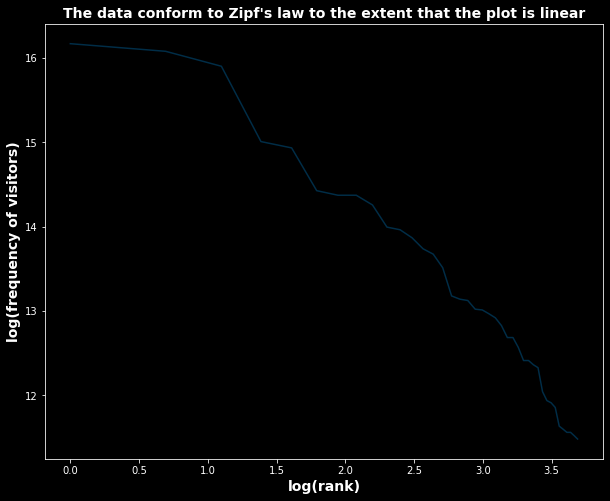

In [12]:
data = merged_US_states_visitation.copy()

# create the 1/n n is the tourism rank in 2019
data = data.sort_values(by='visitation_2019',ascending=False).reset_index(drop=True)
data.reset_index(inplace=True)
# add 1 to the index to get the rank
data['index']= data.index + 1
data.rename(columns={'index':'rank'},inplace=True)
data['zipf'] = data.visitation_2019*(1/data['rank']) #alternate power **1.07
data['state'] = data['state'].astype('str') # String for plotting

# create log of rank and log of tourism 'frequency'
data['2019_log'] = np.log(data['visitation_2019'])
data['rank_log'] = np.log(data['rank'])

# bar chart plotting visitor numbers
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=data, x='state',y='visitation_2019', color="#cccccc")
plt.xticks(rotation=45, fontsize = 10, ha='right')
plt.ylabel('Number of Visitors', fontsize = 14, fontweight='bold')
plt.xlabel('State / Territory', fontsize = 14, fontweight='bold')
plt.title('Overseas Visitors in 2019 to US Territories', fontsize = 20, fontweight='bold')

#line chart plotting zipf frequency estimate
plt.plot(data['state'], data['zipf'], color="#002d47", label='Zipf calculation')
plt.legend(loc='upper right')
#sns.lineplot(data=data,x='state',y='zipf', color="red", legend='auto') # old plot

#annotate
ax.annotate('Not 1/n relationship',
        xy=('California', 3146225),
        xycoords='data',
        xytext=(50,100),
        textcoords='offset points',
        arrowprops=dict(headwidth=10, width=2, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
        fontsize=12)

plt.show()

# Zipf law on log log graph
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=data,x='rank_log',y='2019_log', color="#002d47")
plt.ylabel('log(frequency of visitors)', fontsize = 14, fontweight='bold')
plt.xlabel('log(rank)', fontsize = 14, fontweight='bold')
plt.title("The data conform to Zipf's law to the extent that the plot is linear", fontsize = 14, fontweight='bold')

# Exploring Data Distributions
<p> Here we are just going to run through plotting smaple distributions to show how we can visually analyze distributions</p>

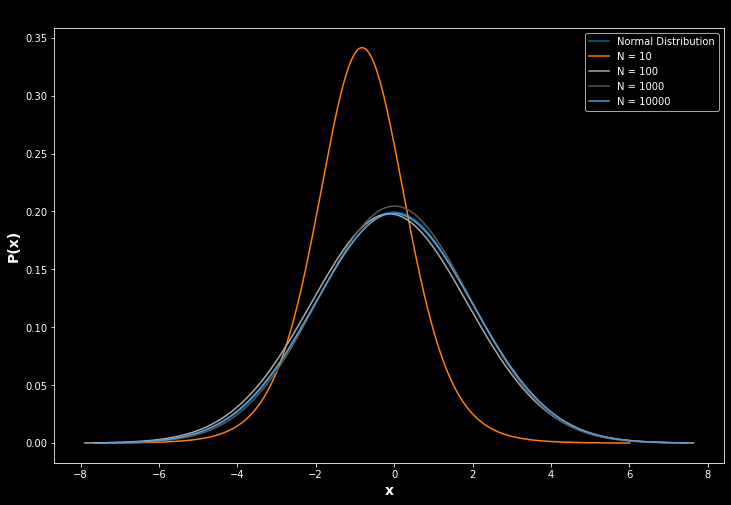

<ipython-input-13-3bb6f6eec600>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","N = 10", "N = 100",'N = 1000','N = 10000',"Normal Distribution"])


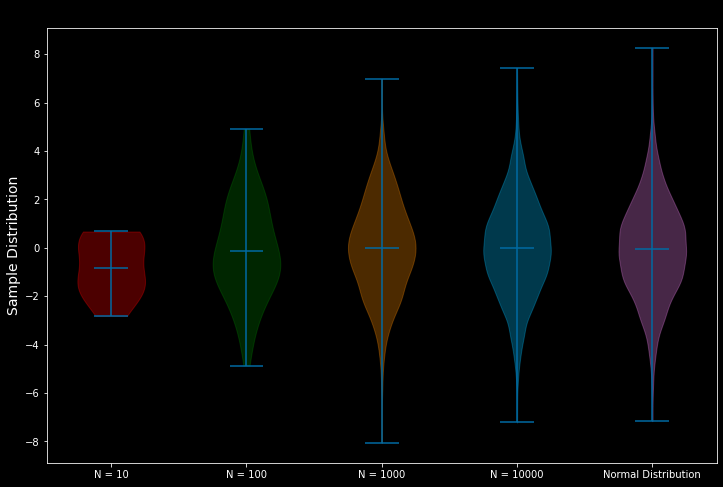

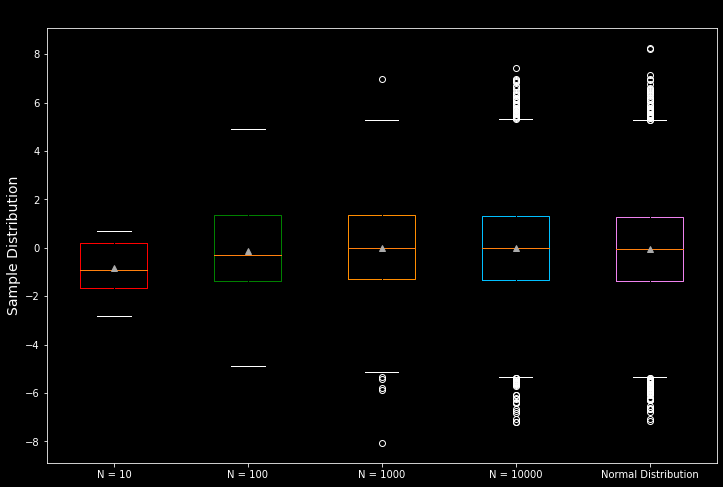

In [13]:
plt.style.use('tableau-colorblind10') #set plotting styles

# Set a random seed for replication
np.random.seed(2) 

# Let's create a funciton to generate samples
def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values
    
    return t_dist, x_axis, t_sample


def make_prob_plot():

    # creating a normal distribution plot 
    rv = stats.norm(loc= 0, scale=2) 
    norm_sample = stats.norm.rvs(loc= 0, scale=2, size=10000)
    x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 500) 
    y = rv.pdf(x)

    #make variables x10,x100,x1000,x10000 and y10,y100,y1000,y10000
    rv1, x10, sample10 = make_t_distribution(10, 0, 2)
    y10 = rv1.pdf(x10)

    rv2, x100, sample100 = make_t_distribution(100, 0, 2)
    y100 = rv2.pdf(x100)

    rv3, x1000, sample1000 = make_t_distribution(1000, 0, 2)
    y1000 = rv3.pdf(x1000)

    rv4, x10000, sample10000 = make_t_distribution(10000, 0, 2)
    y10000 = rv4.pdf(x10000)
    
    # Set up plot list for looping
    plot_list = [(x,y,'Normal Distribution'),(x10,y10,'N = 10'),(x100,y100,'N = 100'),(x1000,y1000,'N = 1000'),(x10000,y10000,'N = 10000')]

    # Probability density plot
    fig, ax = plt.subplots(figsize=(12, 8)) # frame the plot
    #plt.xlim(-10, 10) # set size limit

    # Loop to create plots
    for tuples in plot_list:
        x,y,label = tuples
        plt.plot(x,y,label=label)
    
    ax.legend()
    plt.ylabel('P(x)',fontsize = 14,fontweight='bold')
    plt.xlabel('x',fontsize = 14,fontweight='bold')
    plt.title(f'Sampling Density Plot Comparison with μ=0  σ=2 ',fontsize = 20, fontweight='bold', color='black')
    plt.show() # show finished density plot

    # Violin plots
    fig, ax = plt.subplots(figsize=(12, 8)) # frame the plot
    distributions = (sample10, sample100, sample1000, sample10000, norm_sample)
    violinplt = plt.violinplot(distributions,showmeans=True) 
    violinplt['bodies'][0].set_color('r')
    violinplt['bodies'][1].set_color('g')
    violinplt['bodies'][2].set_color('darkorange')
    violinplt['bodies'][3].set_color('deepskyblue')
    violinplt['bodies'][4].set_color('violet')
    ax.set_xticklabels(["","N = 10", "N = 100",'N = 1000','N = 10000',"Normal Distribution"])
    plt.ylabel('Sample Distribution',fontsize = 14)
    plt.title(f'Sampling Violin Plot Comparison with μ=0  σ=2 ',fontsize = 20, fontweight='bold', color='black')
    plt.show()

    # Box plots
    fig, ax = plt.subplots(figsize=(12, 8)) # frame the plot
    boxplt = plt.boxplot(distributions,showmeans=True, labels = ("N = 10", "N = 100",'N = 1000','N = 10000',"Normal Distribution")) 
    plt.setp(boxplt['whiskers'], color='black')
    boxplt['boxes'][0].set_color('r')
    #boxplt['whiskers'][0].set_color('r')
    boxplt['boxes'][1].set_color('g')
    #boxplt['whiskers'][1].set_color('g')
    boxplt['boxes'][2].set_color('darkorange')
    #boxplt['whiskers'][2].set_color('darkorange')
    boxplt['boxes'][3].set_color('deepskyblue')
    #boxplt['whiskers'][3].set_color('deepskyblue')
    boxplt['boxes'][4].set_color('violet')
    #boxplt['whiskers'][4].set_color('violet')
    plt.ylabel('Sample Distribution',fontsize = 14)
    plt.title(f'Sampling Box Plot Comparison with μ=0  σ=2',fontsize = 20, fontweight='bold',color='black')
    plt.show()

    return None

make_prob_plot()

# Exploring Student Metrics
<p>Imagine our job responsibilities is to offer instructional advice based on course performance metrics.</p>

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

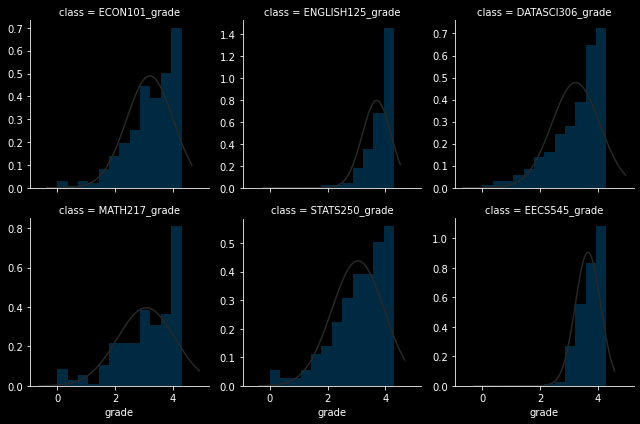

In [22]:
# Import data
grades = pd.read_csv('assets/class_grades_2.csv')

# Let's map definitions of letters to numeric values
VALID_GRADES = ['A+','A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
NUMERIC_GRADES = [4.3,4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))

# Let's apply the map to the data
grade_dist = grades.replace(grade_point_dict)

# Create count plots by melting into long form 
grades_melted = pd.melt(grade_dist, id_vars=grades.columns[0], value_vars=list(grades.columns[1:]),var_name='class',value_name='grade' )

# Plot Histogram for classes with grades
g = sns.FacetGrid(grades_melted[grades_melted.grade.notna()], col = "class", col_wrap=3,sharey=False)
g.map(sns.distplot, "grade", kde = False, fit=stats.norm, norm_hist = True,bins=12)
plt.tight_layout()

plt.show()

Before we would launch statistical tests, we would need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. A QQ-plot is a great method to determine how similar a distribution is to another. For each QQ-plot, we will also mark observations which are 2 standard deviations outside from the QQ-line.

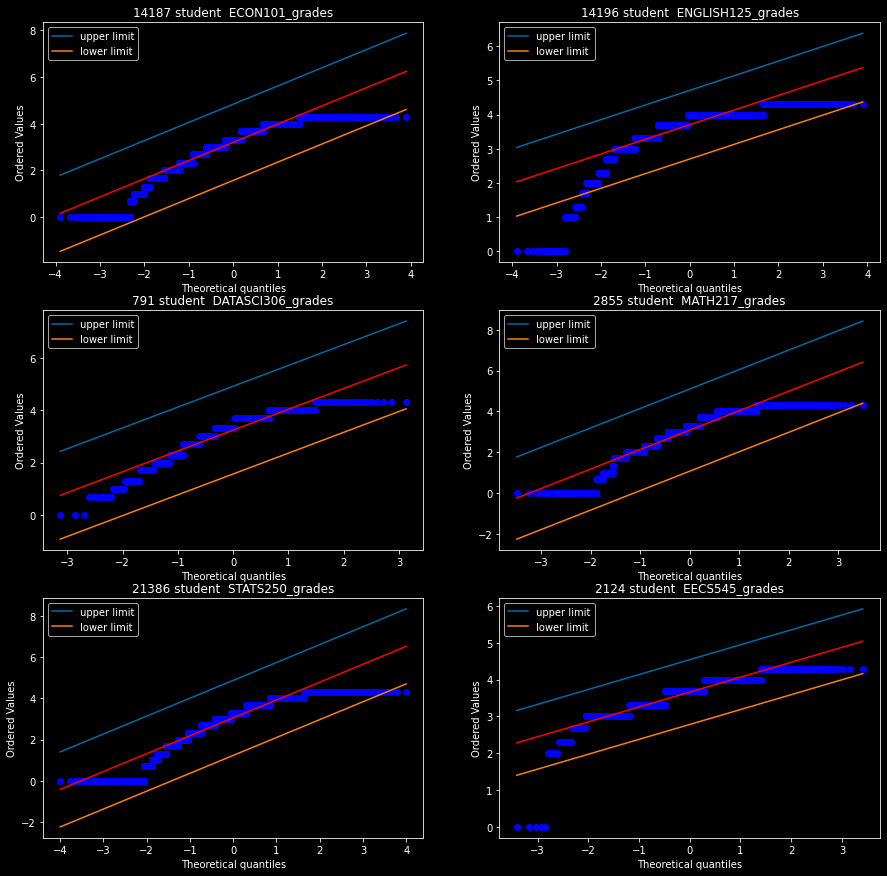

In [23]:
# set up 
fig = plt.figure(figsize=(15,15))
n = 320 # projection space (3 row, 2 col, position) -> 320

for col in grade_dist.columns[1:]: # this loop does all the work

    n += 1 #iteratively moving the plot position
    ax = fig.add_subplot(n)
    class_grades = grade_dist[col][grade_dist[col].notna()] # isolate pandas series
    (osm,osr), (slope,intercept, _) = stats.probplot(class_grades, dist=stats.norm, plot=ax) # plot

    # plot 2 std upper and lower bounds
    upper_limit = slope*osm+ intercept + 2*class_grades.std()
    ax.plot(osm, upper_limit, label="upper limit")
    lower_limit = slope*osm+ intercept - 2*class_grades.std()
    ax.plot(osm, lower_limit, label="lower limit")

    # titles & legends
    ax.set_title(f"{class_grades.count()} student  {col}s") # f"ormatted" string is the future
    ax.legend(loc="upper left") 

    # loop back

plt.show()